In [1]:
import numpy
from scipy.stats import bernoulli, beta, uniform

In [2]:
thetas = numpy.array([0.9, 0.8, 0.7])
k = thetas.shape[0]

In [3]:
N = 1_000
sims = 5_000

In [4]:
observations = bernoulli(thetas).rvs((N, sims, k))

## Greedy

In [5]:
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
# add little noise so argmax choses random element
alphas += numpy.random.normal(numpy.zeros_like(alphas), 1e-8)
actions_g = []
idx = numpy.arange(sims)

for t in range(N):
    
    theta_hat = alphas / (alphas + betas) # mean of Beta dist.
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    actions_g.append(action)

In [6]:
a_g = numpy.array(actions_g)

In [7]:
import matplotlib.pyplot as plt

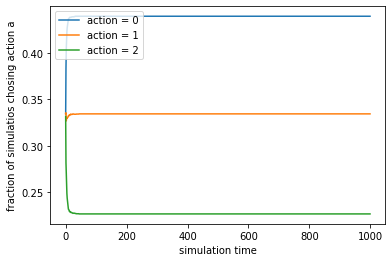

In [8]:
for a in range(3):
    plt.plot((a_g == a).mean(axis=1), label=f"action = {a}")
plt.xlabel("simulation time")
plt.ylabel("fraction of simulatios chosing action a")
plt.legend()

## Thompson Sampling

In [9]:
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
actions_t = []
dists = []
idx = numpy.arange(sims)

for t in range(N):
    
    theta_hat = beta(alphas, betas).rvs((sims, k))
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    
    actions_t.append(action)
    dists.append(beta(alphas.copy(), betas.copy()))

In [10]:
a_t = numpy.array(actions_t)

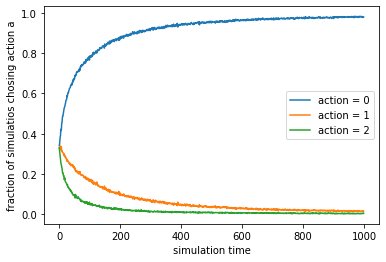

In [11]:
for a in range(3):
    plt.plot((a_t == a).mean(axis=1), label=f"action = {a}")
plt.xlabel("simulation time")
plt.ylabel("fraction of simulatios chosing action a")
plt.legend()

In [12]:
import pandas

In [13]:
d = dists[9]

In [14]:
d.rvs([5000, 3])[:,0]

array([0.94443217, 0.60237653, 0.68625338, ..., 0.96389738, 0.63110525,
       0.88125295])

In [15]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,0]
    for t in [1, 10, 50, 100, 400, 1000]
})

In [16]:
import seaborn as sns

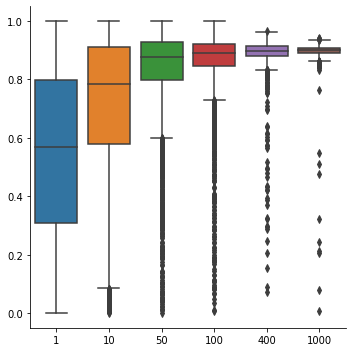

In [17]:
sns.catplot(data=samples, kind='box')

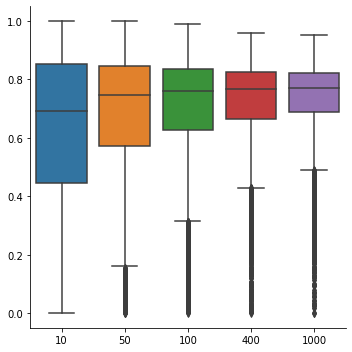

In [18]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,1]
    for t in [10, 50, 100, 400, 1000]
})
sns.catplot(data=samples, kind='box')

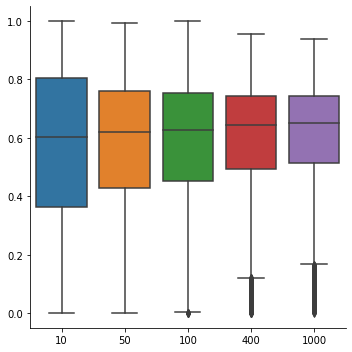

In [19]:
samples = pandas.DataFrame({
    t: dists[t-1].rvs([sims, k])[:,2]
    for t in [10, 50, 100, 400, 1000]
})
sns.catplot(data=samples, kind='box')

# Random thetas

In [20]:
thetas_r = uniform(0, 1).rvs((sims, k))
theta_max = thetas_r.max(axis=1) # to know what the optimum theta is
observations = bernoulli(thetas_r).rvs((N, sims, k))
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))
# add little noise so argmax choses random element
alphas += numpy.random.normal(numpy.zeros_like(alphas), 1e-8)
regret_g = []
idx = numpy.arange(sims)

for t in range(N):
    
    theta_hat = alphas / (alphas + betas) # mean of Beta dist.
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    regret_g.append(theta_max - thetas_r[idx, action])

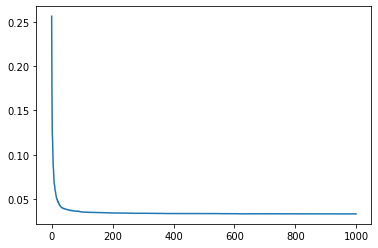

In [21]:
plt.plot(numpy.array(regret_g).mean(axis=1))

In [22]:
thetas_r = uniform(0, 1).rvs((sims, k))
theta_max = thetas_r.max(axis=1) # to know what the optimum theta is
observations = bernoulli(thetas_r).rvs((N, sims, k))
# priors
alphas = numpy.ones((sims, k))
betas = numpy.ones((sims, k))

regret_th = []
idx = numpy.arange(sims)

for t in range(N):
    
    theta_hat = beta(alphas, betas).rvs((sims, k))
    action = numpy.argmax(theta_hat, axis=1)
    r = observations[t, idx, action]
    alphas[idx, action] += r
    betas[idx, action] += (1-r)
    regret_th.append(theta_max - thetas_r[idx, action])

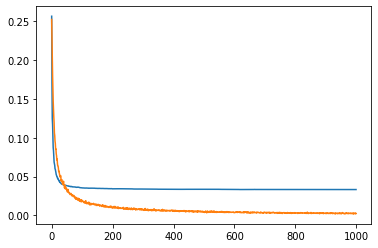

In [23]:
plt.plot(numpy.array(regret_g).mean(axis=1))
plt.plot(numpy.array(regret_th).mean(axis=1))